<a href="https://colab.research.google.com/github/MohamedXAdel/Cryptocurrency-price-prediction/blob/main/ML_Phase2(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random


env = gym.make("Blackjack-v1", sab=True, render_mode=None)


def q_learning(env, total_timesteps, gamma=1.0, alpha=0.1, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) #returns a numpy array of zeros one for each action[hena fe el blackjack ya hit ya stick[Q(stick), Q(hit)]]
    timesteps = 0
    while timesteps < total_timesteps:
        state, _ = env.reset()
        done = False
      #GREEDY ACTION SELECTION
      #At each step in the game the agent has 2 options: 1.Explore|| 2.Exploit
        while not done:
            if random.random() < epsilon:
                action = env.action_space.sample() #Explore: try something new  even if it’s not the best[Pick a random action from the action space(stick or hit)]
            else:
                action = np.argmax(Q[state]) #Exploit: use what it already knows is the best move [choose from the list of Q-values and returns the index (action) with the highest Q-value]

            next_state, reward, done, _, _ = env.step(action) #_: Extra values we’re not using (like info or truncated)

            best_next_action = np.argmax(Q[next_state]) #bageb el index of the highest Q-value at next_state

            td_target = reward + gamma * Q[next_state][best_next_action]# rule bt3t el lec:Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]

            td_delta = td_target - Q[state][action]#difference between=What we think we should have-What we currently believe[shows how much we were wrong.]

            Q[state][action] += alpha * td_delta # Q-value update

            state = next_state
            timesteps += 1
            if timesteps >= total_timesteps:
                break
    return Q

#=======================================================================
def evaluate_policy(Q, env, episodes=10):
    total_rewards = []
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = np.argmax(Q[state]) if state in Q else env.action_space.sample()
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
        total_rewards.append(total_reward)
    return np.mean(total_rewards), np.std(total_rewards)


In [5]:
timesteps_list = [10000, 50000, 100000, 200000, 500000]
results = []

for t in timesteps_list:
    Q = q_learning(env, total_timesteps=t)
    mean_reward, std_reward = evaluate_policy(Q, env, episodes=10)
    results.append((t, mean_reward, std_reward))
    print(f"Timesteps: {t}, Mean Reward: {mean_reward:.2f}, Std: {std_reward:.2f}")


Timesteps: 10000, Mean Reward: -0.40, Std: 0.92


KeyboardInterrupt: 

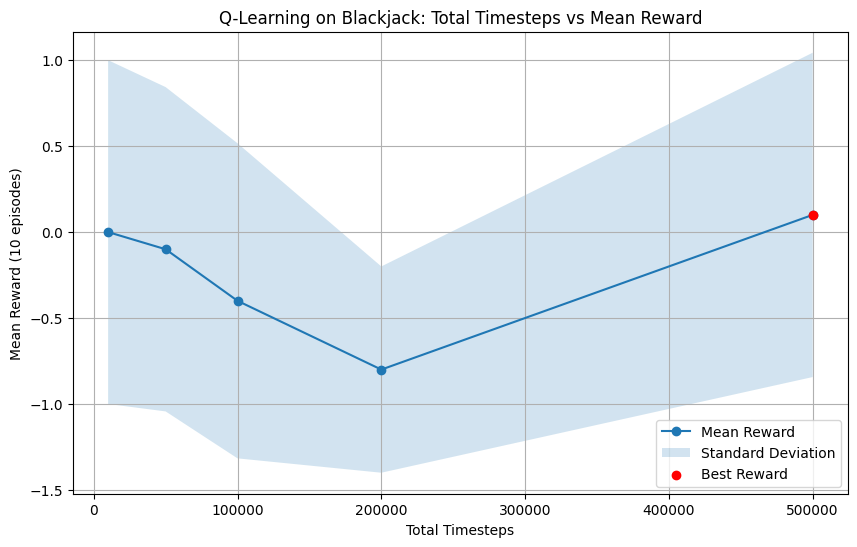

Best mean reward: 0.10 at 500000 timesteps


In [ ]:
# Unpack results
timesteps, mean_rewards, std_rewards = zip(*results)

# Find best result
best_result = max(results, key=lambda x: x[1])  # (timestep, mean, std)

# Plot
plt.figure(figsize=(10,6))
plt.plot(timesteps, mean_rewards, marker='o', label='Mean Reward')
plt.fill_between(timesteps,
                 np.array(mean_rewards) - np.array(std_rewards),
                 np.array(mean_rewards) + np.array(std_rewards),
                 alpha=0.2, label='Standard Deviation')

# Highlight the best point
plt.scatter(best_result[0], best_result[1], color='red', label='Best Reward', zorder=5)
plt.legend()

# Labels and grid
plt.xlabel("Total Timesteps")
plt.ylabel("Mean Reward (10 episodes)")
plt.title("Q-Learning on Blackjack: Total Timesteps vs Mean Reward")
plt.grid()
plt.show()

# Also print it
print(f"Best mean reward: {best_result[1]:.2f} at {best_result[0]} timesteps")



In [6]:
# Choose model with highest mean reward
best_index = np.argmax(mean_rewards)
def default_action_values():
    return np.zeros(env.action_space.n)

Q = defaultdict(default_action_values)


import pickle
with open("best_blackjack_q_table.pkl", "wb") as f:
    pickle.dump(Q, f)



ValueError: attempt to get argmax of an empty sequence

In [ ]:
timesteps_list = [10000, 50000, 100000, 200000, 500000]
results = []
runs_per_timestep = 3
for t in timesteps_list:
    mean_rewards = []
    std_rewards = []

    for _ in range(runs_per_timestep):
        Q = q_learning(env, total_timesteps=t)
        mean, std = evaluate_policy(Q, env, episodes=10)
        mean_rewards.append(mean)
        std_rewards.append(std)

    avg_mean = np.mean(mean_rewards)
    avg_std = np.mean(std_rewards)

    results.append((t, avg_mean, avg_std))
    print(f"Timestep: {t} → Avg Mean: {avg_mean:.2f}, Avg Std: {avg_std:.2f}")


Timestep: 10000 → Avg Mean: -0.23, Avg Std: 0.90
Timestep: 50000 → Avg Mean: 0.00, Avg Std: 0.95
Timestep: 100000 → Avg Mean: -0.37, Avg Std: 0.83


In [1]:
# Unpack results
timesteps, mean_rewards, std_rewards = zip(*results)

# Find best result
best_result = max(results, key=lambda x: x[1])  # (timestep, mean, std)

# Plot
plt.figure(figsize=(10,6))
plt.plot(timesteps, mean_rewards, marker='o', label='Mean Reward')
plt.fill_between(timesteps,
                 np.array(mean_rewards) - np.array(std_rewards),
                 np.array(mean_rewards) + np.array(std_rewards),
                 alpha=0.3, label='Standard Deviation')

# Highlight the best point
plt.scatter(best_result[0], best_result[1], color='red', label='Best Reward', zorder=5)
plt.legend()

# Labels and grid
plt.xlabel("Total Timesteps")
plt.ylabel("Mean Reward (10 episodes)")
plt.title("Q-Learning on Blackjack: Total Timesteps vs Mean Reward")
plt.grid(True)
plt.show()

# Print best result
print(f"Best Avgerage mean reward: {best_result[1]:.2f} at {best_result[0]} timesteps")

NameError: name 'results' is not defined